Building a Machine Learning Model to Predict Parkinson Disease in Patients # 

Neurodegenerative diseases are a heterogeneous group of disorders that are characterized by the progressive degeneration of the structure and function of the nervous system. They are incurable and debilitating conditions that cause problems with mental functioning also called dementias.
This project aims to focus on the parkinson disease and build a machine learning model that will be able to predict if a patient has parkinson disease or not.

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording. The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

Attribute Information:

Matrix column entries (attributes): MDVP:Fo(Hz) - Average vocal fundamental frequency MDVP:Fhi(Hz) - Maximum vocal fundamental frequency MDVP:Flo(Hz) - Minimum vocal fundamental frequency MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude NHR,HNR - Two measures of ratio of noise to tonal components in the voice status - Health status of the subject (one) - Parkinson's, (zero) - healthy RPDE,D2 - Two nonlinear dynamical complexity measures DFA - Signal fractal scaling exponent spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

We will start off by importing the necessary libraries for data manipulation and exploration.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# We will load the dataset and convert it into a pandas dataframe
df = pd.read_csv('parkinsons.data')

Data exploration

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

The first question we'd like to ask is whether the data has missing values. It is apparent from the output above that the data does not contain missing values for any column.

In [10]:
df.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S02_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df.shape

(195, 24)

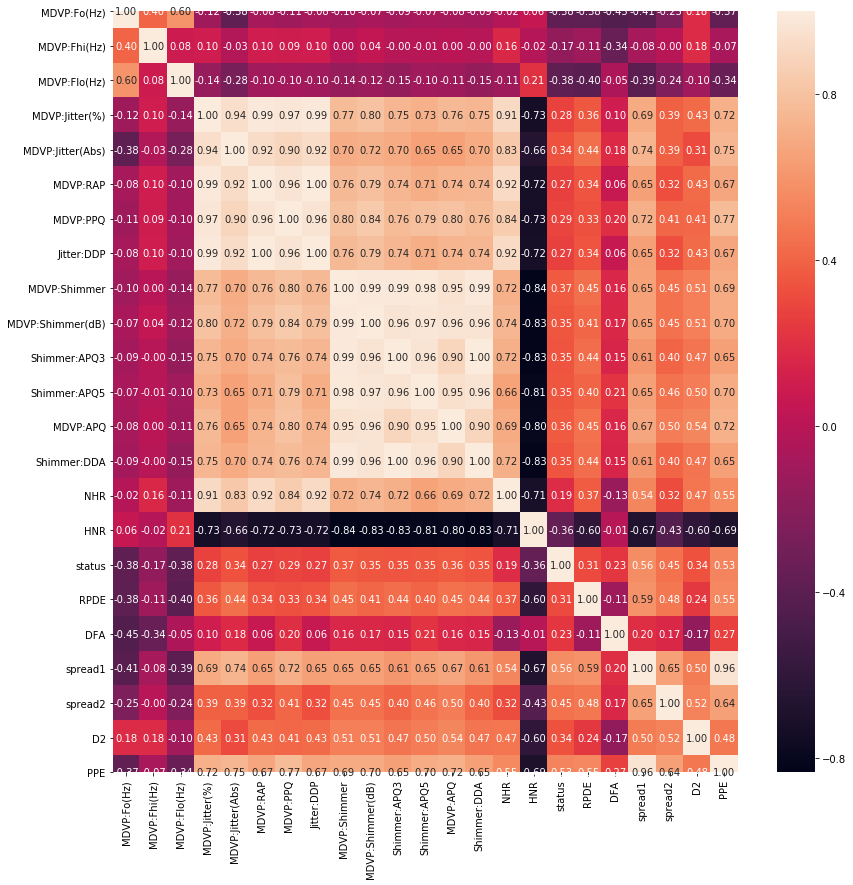

In [17]:
#correlation data
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt=".2f")
plt.xticks(rotation=90)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16920a910>,
      dtype=object)

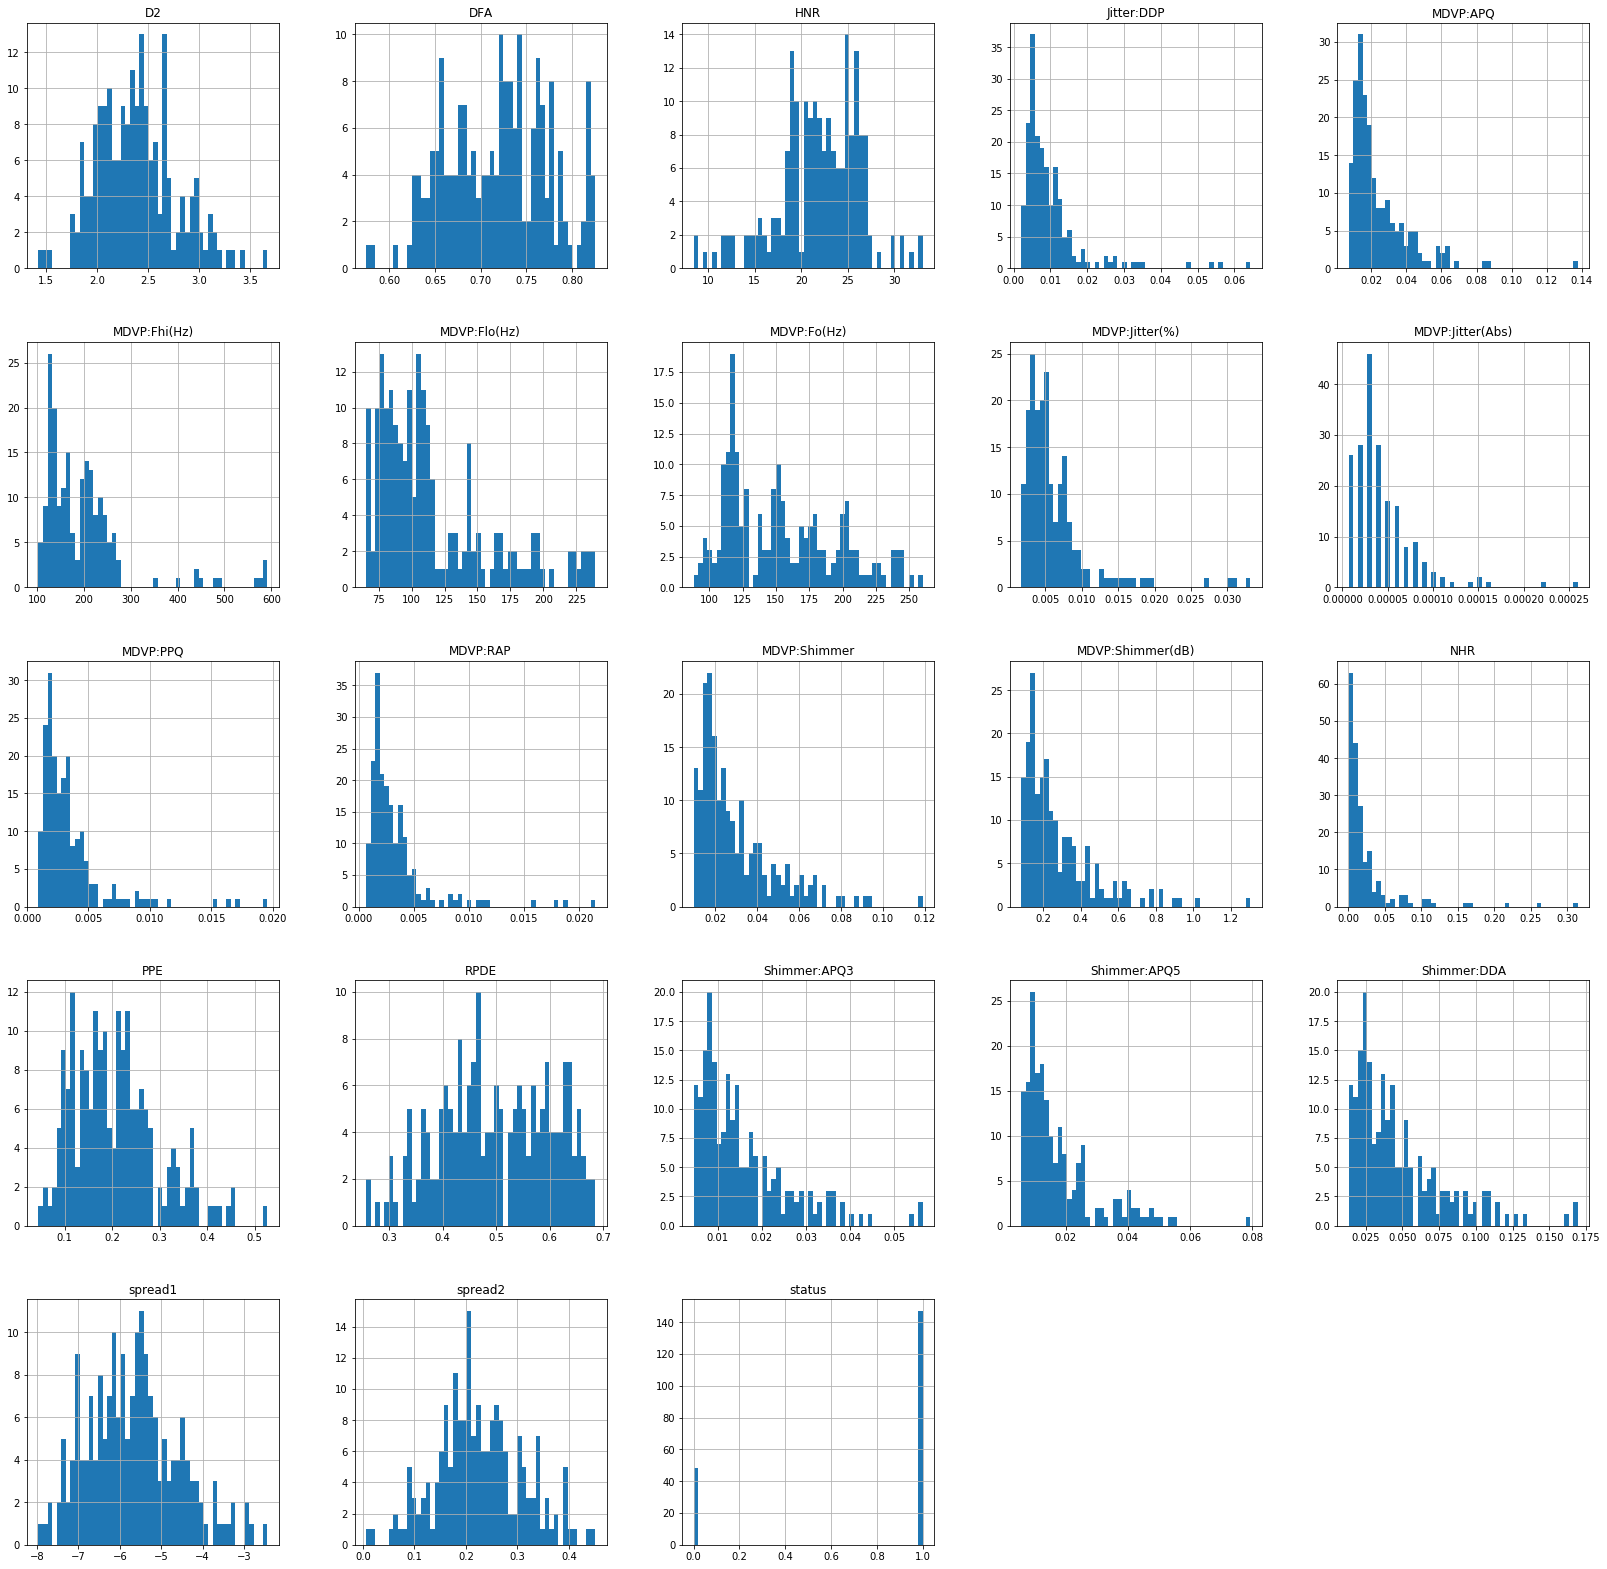

In [9]:
df.hist(bins=50, figsize=(28,28))

The next question we'd like to ask is which machine learning method should we use on our data to help us with predictions on future unseen data. From the Data Set Information above we highlighted that the "status" column is set to 0 for healthy and 1 for PD which makes it a suitable for binary classification problem. The image above coroborates this assertion.

### Building a Supervised Learning Model

Lets assign the variable y to be our target variable.

In [11]:
y =  df.status.values

In [12]:
# getting the type of y
type(y)

numpy.ndarray

We will now assign X as features by getting rid of the "name" and "status" columns

In [14]:
X = df.drop(['name', 'status'], axis=1)

In [15]:
# getting the type of the features
type(X)

pandas.core.frame.DataFrame

In [16]:
# making sure we have no missing values in the features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [19]:
X.shape

(195, 22)

In [20]:
y.shape

(195,)

Splitting the dataset into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Instantiate a classifier for KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=6)

Fit the model to the training set

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Using the model to predict on the test data

In [24]:
y_pred = knn.predict(X_test)

In [25]:
print('Test set prediction: \n {}'.format(y_pred))

Test set prediction: 
 [1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1]


How well did our model preform?

In [26]:
knn.score(X_test, y_test)

0.8717948717948718

From above, we see that we have an accuracy score of 87%!

But before getting confortable with the model, let's check if there is a better number of neighbors we could use for the model.

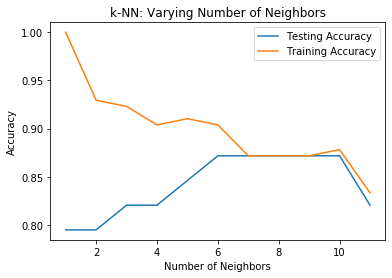

In [27]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


From the above figure, we see that the test accuracy is highest using 6 through 10 neighbours. Thus, any value in this range will be a goo value for the number of neighbors.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(y_test, y_pred))

[[ 6  4]
 [ 1 28]]


From the confusion matrix above, we have 6 True Positives and 24 True Negatives!

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39



Metrics for classification. Above, we computed the accuracy of our metrics and got about 87% accuracy score. But accuracy is not always an informative metric. This is why we have evaluated the preformance of our model by computing the confusion matrics and generating the classification report. We see high f1-score and recall, this shows that our model performed well.

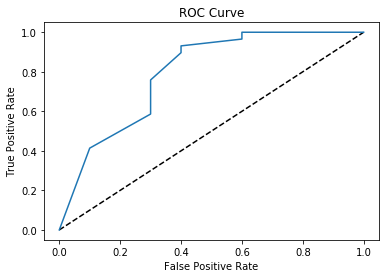

In [31]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

From the ROC Curve above, we see that there is high probability for True Positives which is great in evaluating our model!

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
confusion_matrix(y_test1, y_pred1)

array([[ 5,  5],
       [ 0, 29]])

In [35]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



In [36]:
logreg.score(X_test, y_test)

0.8717948717948718

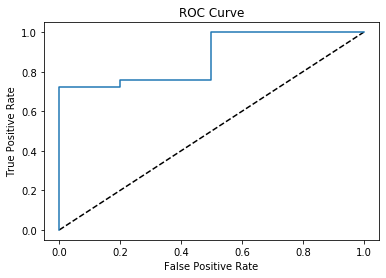

In [37]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob1 = logreg.predict_proba(X_test1)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_prob1)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=11, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
knn_cv.best_params_

{'n_neighbors': 15}

In [41]:
knn_cv.best_score_


0.7794871794871795